In [1]:
import pandas as pd

In [2]:
# 📥 Load Data
from MLOpsDatasets.dataset_manager import DatasetManager
manager = DatasetManager()
df = manager.download('waterMeterDemoData_df.zip')
if df is None:
    raise ValueError("❌ Dataset could not be loaded.")

In [3]:
df.head()

,user key,datetime,meter reading,diff,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Cluster,Part of Day,Anomaly
0,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 21:34:42,211134.0,0.0,False,False,False,True,False,False,False,False,True,False,False,0,Night,0
1,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 20:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0
2,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 19:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0
3,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 18:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0
4,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 17:34:45,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0


In [4]:
print(f"Data type of 'Anomaly' column: {df['Anomaly'].dtype}")
print(f"Unique values in 'Anomaly' column: {df['Anomaly'].unique()}")
print("Value counts of 'Anomaly' column:")
print(df['Anomaly'].value_counts())

Data type of 'Anomaly' column: int64
Unique values in 'Anomaly' column: [0 1]
Value counts of 'Anomaly' column:
Anomaly
0    359684
1      2028
Name: count, dtype: int64


In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
user key                 0
datetime                 0
meter reading            0
diff                     0
part_of_day_Afternoon    0
part_of_day_Evening      0
part_of_day_Morning      0
part_of_day_Night        0
day_of_week_Friday       0
day_of_week_Monday       0
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Cluster                  0
Part of Day              0
Anomaly                  0
dtype: int64


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week_name'] = df['datetime'].dt.day_name()
display(df[['datetime', 'hour', 'day_of_week_name', 'diff']].head())

,datetime,hour,day_of_week_name,diff
0,2016-06-30 21:34:42,21,Thursday,0.0
1,2016-06-30 20:34:42,20,Thursday,0.0
2,2016-06-30 19:34:42,19,Thursday,0.0
3,2016-06-30 18:34:42,18,Thursday,0.0
4,2016-06-30 17:34:45,17,Thursday,0.0


In [7]:
user_anomaly_summary = df.groupby('user key')['Anomaly'].agg(['count', 'sum']).reset_index()
user_anomaly_summary.columns = ['user key', 'total_entries', 'total_anomalies']
user_anomaly_summary['anomaly_rate'] = user_anomaly_summary['total_anomalies'] / user_anomaly_summary['total_entries']

sorted_users_by_anomaly_rate = user_anomaly_summary.sort_values(by='anomaly_rate', ascending=False)

print("Top 10 users with highest anomaly rates:")
display(sorted_users_by_anomaly_rate.head(10))

print("\nBottom 10 users with lowest anomaly rates (excluding users with 0 entries):")
bottom_users = sorted_users_by_anomaly_rate[sorted_users_by_anomaly_rate['total_entries'] > 0].sort_values(by='anomaly_rate', ascending=True)
display(bottom_users.head(10))

average_anomaly_rate_all_users = user_anomaly_summary['anomaly_rate'].mean()
print(f"\nAverage anomaly rate across all users: {average_anomaly_rate_all_users:.4f}")

Top 10 users with highest anomaly rates:


,user key,total_entries,total_anomalies,anomaly_rate
21,2a50bd5b-5fd1-4461-af53-5c4bc6384187,4,1,0.250000
32,3974f2ba-1ca2-463c-b16e-cf9de8d98058,60,11,0.183333
13,15d5e05b-3100-408c-bc2e-498e5999ba2a,268,38,0.141791
34,43c1ae5f-7890-497b-9a91-3c40ddab8f9f,1260,84,0.066667
1,08835f7d-fd2f-48fc-a846-26608e3fdce0,3831,201,0.052467
91,bdd6f63c-8fa3-493b-88af-b4b6962b89b2,2628,94,0.035769
45,651add71-b150-47a6-ad29-ceec3eacd0ad,4275,146,0.034152
42,51c5f7c9-10b1-4727-82d7-ee69a1ea8619,2715,92,0.033886
98,c7c4f3b5-1b20-463a-9790-b15737d883b8,2448,81,0.033088
64,89fafd74-ba88-4edb-987d-afa3680b2172,2655,86,0.032392



Bottom 10 users with lowest anomaly rates (excluding users with 0 entries):


,user key,total_entries,total_anomalies,anomaly_rate
3,0b64a189-f0e5-4444-9bba-1200fefdbc47,3780,0,0.0
101,e14e44b0-1b85-4343-a618-61e92984adfd,4283,0,0.0
66,8b9a4ee9-5b24-4f21-a2f5-ee267d072c66,4135,0,0.0
46,6961a8d6-6714-4e2c-96e2-4e834d6b591f,4255,0,0.0
48,6d4b746b-1c37-4500-876a-1a6c0071bb02,4160,0,0.0
62,86daa7e4-9e0a-4e8a-a3d3-94855867cb37,4144,0,0.0
68,8e81184f-4ccf-4fd1-8c40-272af0f2181e,3211,0,0.0
53,7584369f-c96c-45d2-be9d-edf4a8afd20f,3527,0,0.0
81,a9aa832e-1e44-4b42-9b04-8ad0d398cca5,2504,0,0.0
7,0c373c77-b352-41be-a94d-2b631f6a0efc,3903,0,0.0



Average anomaly rate across all users: 0.0117


In [8]:
# plot for a single user 651add71-b150-47a6-ad29-ceec3eacd0ad	
random_user_key = "651add71-b150-47a6-ad29-ceec3eacd0ad"
user_df = df[df['user key']=="651add71-b150-47a6-ad29-ceec3eacd0ad"]
user_df.head()

,user key,datetime,meter reading,diff,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Cluster,Part of Day,Anomaly,hour,day_of_week_name
57194,651add71-b150-47a6-ad29-ceec3eacd0ad,2016-06-30 23:46:10,557168.0,119.0,False,False,False,True,False,False,False,False,True,False,False,0,Night,0,23,Thursday
57195,651add71-b150-47a6-ad29-ceec3eacd0ad,2016-06-30 22:46:13,557049.0,137.0,False,False,False,True,False,False,False,False,True,False,False,0,Night,0,22,Thursday
57196,651add71-b150-47a6-ad29-ceec3eacd0ad,2016-06-30 21:46:13,556912.0,89.0,False,False,False,True,False,False,False,False,True,False,False,0,Night,0,21,Thursday
57197,651add71-b150-47a6-ad29-ceec3eacd0ad,2016-06-30 20:46:13,556823.0,25.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0,20,Thursday
57198,651add71-b150-47a6-ad29-ceec3eacd0ad,2016-06-30 19:46:13,556798.0,28.0,False,True,False,False,False,False,False,False,True,False,False,1,Evening,0,19,Thursday


In [ ]:
# prompt: make this chart interective

# !pip install plotly

import plotly.express as px
import plotly.graph_objects as go


# Optionally, visualize the 'diff' for the user
fig_diff = px.line(
    user_df,
    x='datetime',
    y='diff',
    title=f'Difference in Meter Readings Over Time for User: {random_user_key}'
)

# Add anomaly diff points as markers
anomaly_diff_points = user_df[user_df['Anomaly'] == 1]
fig_diff.add_scatter(
    x=anomaly_diff_points['datetime'],
    y=anomaly_diff_points['diff'],
    mode='markers',
    name='Diff at Anomaly',
    marker=dict(color='red', size=8)
)

fig_diff.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Difference in Reading'
)

fig_diff.show()

## Analyze anomaly by day and time

### Subtask:
Investigate the distribution of anomalies across different days of the week and times of the day.


Anomaly rates by Day of Week and Hour:


,day_of_week,hour,total_entries,total_anomalies,anomaly_rate
0,Friday,0,2163,132,0.061026
1,Friday,1,2178,136,0.062443
2,Friday,2,2146,109,0.050792
3,Friday,3,2163,111,0.051318
4,Friday,4,2168,95,0.043819
...,...,...,...,...,...
163,Wednesday,19,2142,242,0.112979
164,Wednesday,20,2181,284,0.130215
165,Wednesday,21,2169,294,0.135546
166,Wednesday,22,2134,233,0.109185


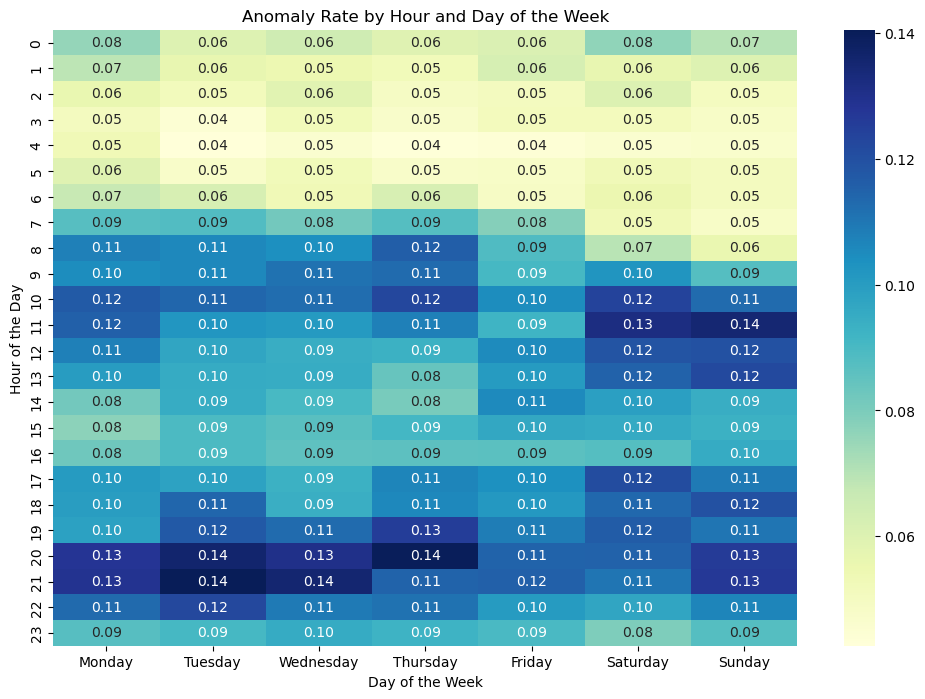

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

day_hour_anomaly = df.groupby(['day_of_week_name', 'hour'])['Anomaly'].agg(['count', 'sum']).reset_index()
day_hour_anomaly.columns = ['day_of_week', 'hour', 'total_entries', 'total_anomalies']
day_hour_anomaly['anomaly_rate'] = day_hour_anomaly['total_anomalies'] / day_hour_anomaly['total_entries']

print("Anomaly rates by Day of Week and Hour:")
display(day_hour_anomaly)

# Create a pivot table for heatmap
anomaly_pivot = day_hour_anomaly.pivot(index='hour', columns='day_of_week', values='anomaly_rate')

# Reorder columns to match the standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
anomaly_pivot = anomaly_pivot[day_order]

plt.figure(figsize=(12, 8))
sns.heatmap(anomaly_pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Anomaly Rate by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

## Analyze anomaly over time

### Subtask:
Examine the trend of anomalies over the entire timeframe of the dataset.


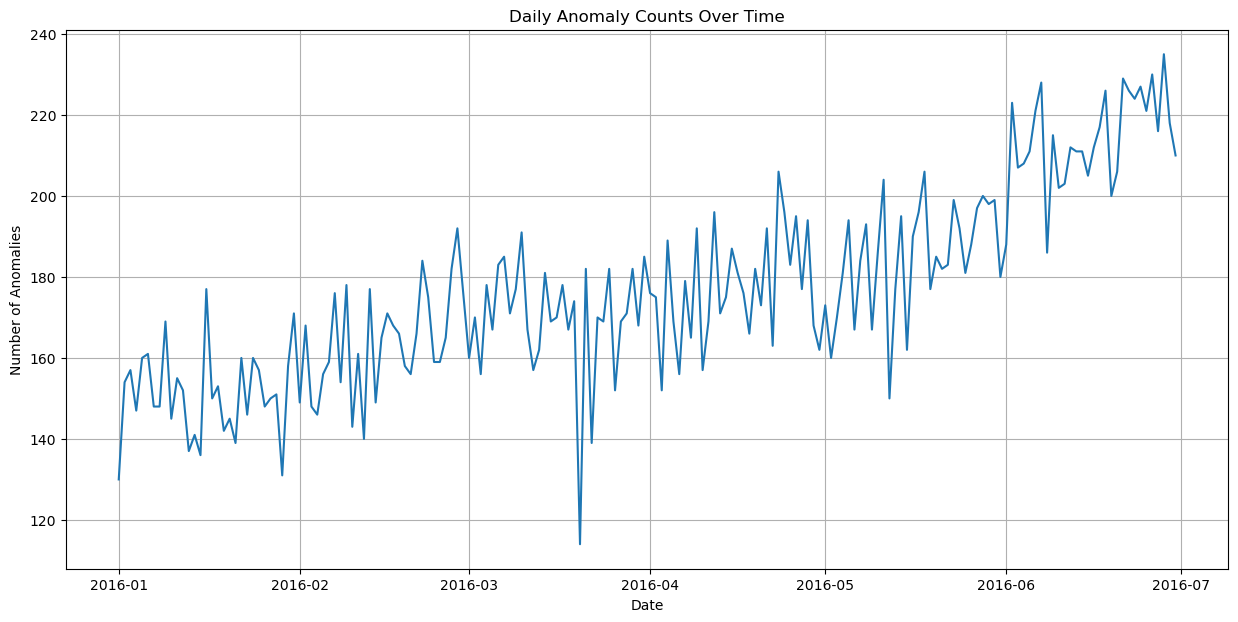

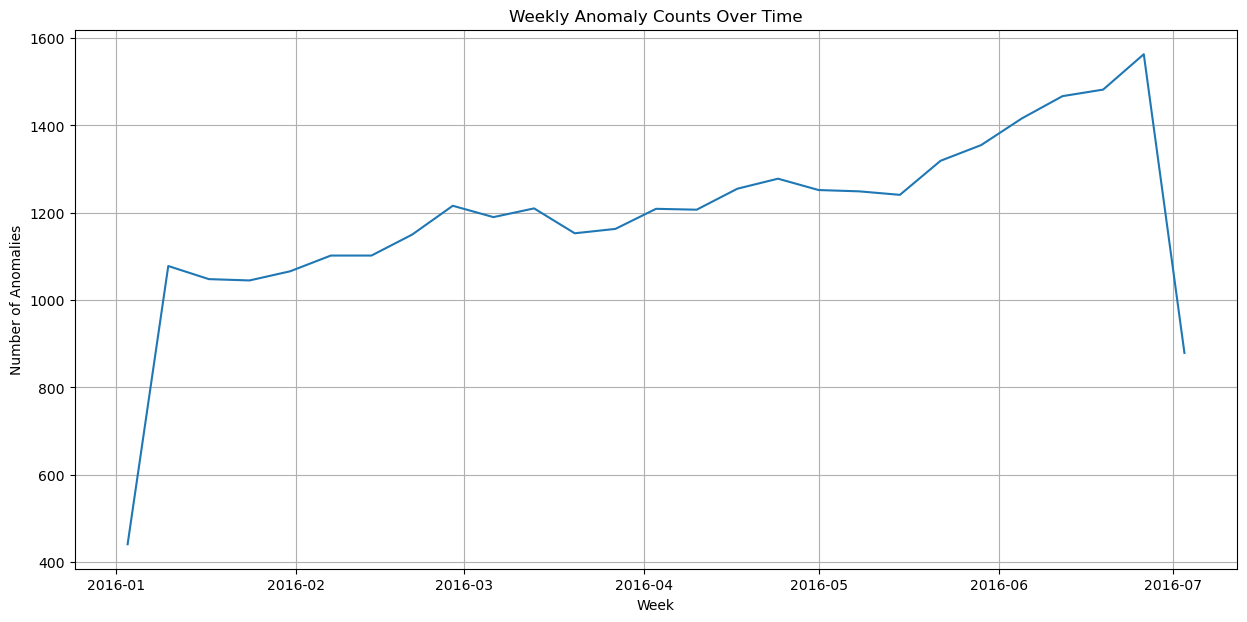

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

daily_anomalies = df['Anomaly'].resample('D').sum()
weekly_anomalies = df['Anomaly'].resample('W').sum()

plt.figure(figsize=(15, 7))
plt.plot(daily_anomalies)
plt.title('Daily Anomaly Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(weekly_anomalies)
plt.title('Weekly Anomaly Counts Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The average anomaly rate across all users is approximately 9.53%.
*   Several users exhibit very high anomaly rates, with some reaching 100%. Conversely, many users have very low or zero anomaly rates.
*   Anomaly rates vary significantly throughout the day and across different days of the week.
*   The heatmap indicates potential peaks in anomaly rates during specific hours and days, although the exact pattern requires closer examination of the visual.
*   There are observable trends in both daily and weekly anomaly counts over the dataset's timeframe, suggesting fluctuations in anomaly occurrences over time.

### Insights or Next Steps

*   Further investigate the users with the highest anomaly rates to understand the underlying reasons for their anomalous behavior.
*   Identify the specific hours and days with the highest anomaly rates from the heatmap to potentially implement targeted monitoring or interventions during these periods.


In [11]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: narwhals
    Found existing installation: narwhals 1.10.0
    Uninstalling narwhals-1.10.0:
      Successfully uninstalled narwhals-1.10.0


In [14]:
# prompt: make this chart interective
import plotly.express as px
import plotly.graph_objects as go


# Create an interactive heatmap using Plotly
# fig_heatmap = px.heatmap(
#     anomaly_pivot,
#     x=anomaly_pivot.columns,
#     y=anomaly_pivot.index,
#     color_continuous_scale='YlGnBu',
#     text_auto='.2f',
#     title='Anomaly Rate by Hour and Day of the Week'
# )

fig_heatmap = go.Figure(data=go.Heatmap(
    z=anomaly_pivot.values,
    x=anomaly_pivot.columns,
    y=anomaly_pivot.index,
    colorscale='YlGnBu',
    text=anomaly_pivot.values,
    texttemplate="%{text:.2f}",
    hoverinfo='x+y+z'
))

fig_heatmap.update_layout(
    title='Anomaly Rate by Hour and Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Hour of the Day',
    yaxis=dict(tickmode='array', tickvals=list(range(24))) # Ensure all hours are shown
)


fig_heatmap.show()

# Create interactive plots for individual users using Plotly

# Choose a random user from the dataset
random_user_key = df['user key'].sample(1).iloc[0]
print(f"Visualizing anomalies for user: {random_user_key}")

# Filter the data for the selected user
user_df = df[df['user key'] == random_user_key].copy()

# Reset index to make datetime a column for Plotly
user_df = user_df.reset_index()

# Plot the meter readings and highlight anomalies for the user
fig_meter_reading = px.line(
    user_df,
    x='datetime',
    y='meter reading',
    title=f'Meter Readings Over Time for User: {random_user_key}'
)

# Add anomaly points as markers
anomaly_points = user_df[user_df['Anomaly'] == 1]
fig_meter_reading.add_scatter(
    x=anomaly_points['datetime'],
    y=anomaly_points['meter reading'],
    mode='markers',
    name='Anomaly',
    marker=dict(color='red', size=8)
)

fig_meter_reading.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Meter Reading'
)

fig_meter_reading.show()


# Optionally, visualize the 'diff' for the user
fig_diff = px.line(
    user_df,
    x='datetime',
    y='diff',
    title=f'Difference in Meter Readings Over Time for User: {random_user_key}'
)

# Add anomaly diff points as markers
anomaly_diff_points = user_df[user_df['Anomaly'] == 1]
fig_diff.add_scatter(
    x=anomaly_diff_points['datetime'],
    y=anomaly_diff_points['diff'],
    mode='markers',
    name='Diff at Anomaly',
    marker=dict(color='red', size=8)
)

fig_diff.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Difference in Reading'
)

fig_diff.show()

Visualizing anomalies for user: 73213d61-2fe0-448a-9ebd-11911bb4d1d5



Analyzing anomaly patterns for user: 73213d61-2fe0-448a-9ebd-11911bb4d1d5
User 73213d61-2fe0-448a-9ebd-11911bb4d1d5 has 1 anomalies out of 2816 entries.
Entries with anomalies for this user:


,Unnamed: 0,user key,meter reading,diff,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Cluster,Part of Day,Anomaly,hour,day_of_week_name
datetime,,,,,,,,,,,,,,,,,,,,
2016-02-27 00:51:39,1679727,73213d61-2fe0-448a-9ebd-11911bb4d1d5,1001.0,392.0,False,False,False,True,False,False,True,False,False,False,False,-1,Night,1,0,Saturday



Meter readings at anomaly points for user 73213d61-2fe0-448a-9ebd-11911bb4d1d5:
datetime
2016-02-27 00:51:39    1001.0
Name: meter reading, dtype: float64

Differences in meter readings at anomaly points for user 73213d61-2fe0-448a-9ebd-11911bb4d1d5:
datetime
2016-02-27 00:51:39    392.0
Name: diff, dtype: float64

No anomaly entries for user 73213d61-2fe0-448a-9ebd-11911bb4d1d5 with meter readings 43 or 50.


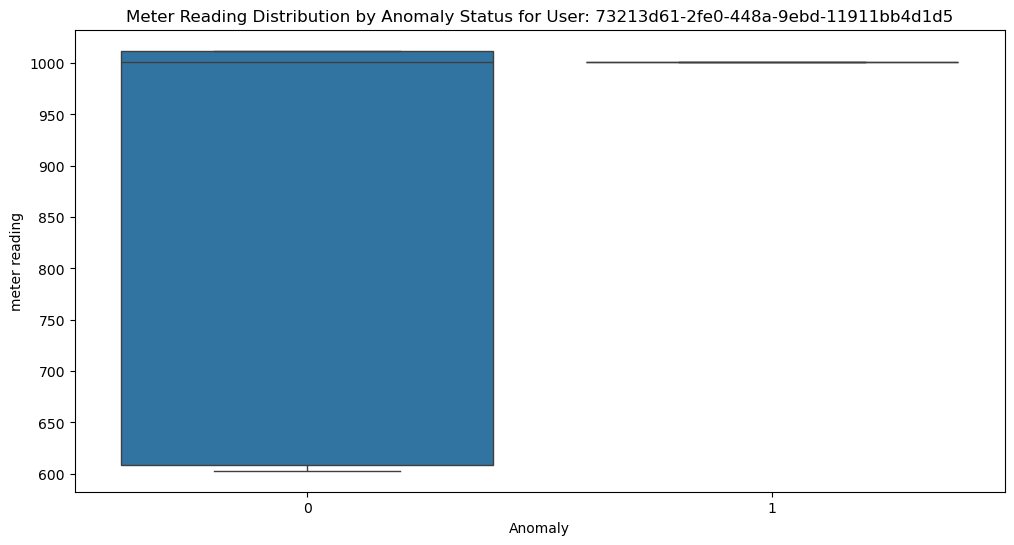

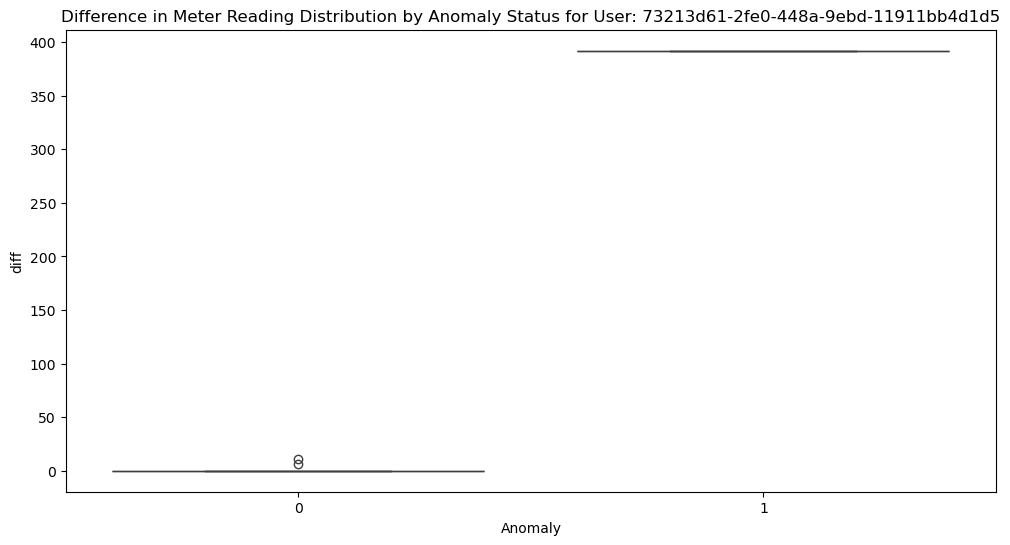

In [15]:
# prompt: can we check if there is any pattern  anomalies for user random_user_key as I can see above that sometime 43 is anomaly and 50 is not

print(f"\nAnalyzing anomaly patterns for user: {random_user_key}")

# Filter the data for the selected user
user_specific_df = df[df['user key'] == random_user_key].copy()

# Check if the user has any anomaly points
if user_specific_df['Anomaly'].sum() > 0:
  print(f"User {random_user_key} has {user_specific_df['Anomaly'].sum()} anomalies out of {len(user_specific_df)} entries.")
  print("Entries with anomalies for this user:")
  display(user_specific_df[user_specific_df['Anomaly'] == 1])

  # Analyze the meter reading and diff values specifically for the anomaly points
  anomaly_readings = user_specific_df[user_specific_df['Anomaly'] == 1]['meter reading']
  anomaly_diffs = user_specific_df[user_specific_df['Anomaly'] == 1]['diff']

  print(f"\nMeter readings at anomaly points for user {random_user_key}:")
  print(anomaly_readings)

  print(f"\nDifferences in meter readings at anomaly points for user {random_user_key}:")
  print(anomaly_diffs)

  # Compare the values of anomaly points (e.g., 43 and 50) for this user
  # You can filter for specific values if you have examples
  specific_anomaly_values = user_specific_df[(user_specific_df['Anomaly'] == 1) & (user_specific_df['meter reading'].isin([43, 50]))]
  if not specific_anomaly_values.empty:
    print(f"\nAnomaly entries for user {random_user_key} with meter readings 43 or 50:")
    display(specific_anomaly_values)
  else:
    print(f"\nNo anomaly entries for user {random_user_key} with meter readings 43 or 50.")

  # You can also analyze the distribution of meter readings and diffs for anomalous vs non-anomalous points for this user
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='Anomaly', y='meter reading', data=user_specific_df)
  plt.title(f'Meter Reading Distribution by Anomaly Status for User: {random_user_key}')
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.boxplot(x='Anomaly', y='diff', data=user_specific_df)
  plt.title(f'Difference in Meter Reading Distribution by Anomaly Status for User: {random_user_key}')
  plt.show()
else:
  print(f"User {random_user_key} has no anomalies recorded.")
